https://learn.microsoft.com/en-us/azure/machine-learning/how-to-access-terminal#add-new-kernels

The basic steps are:

1. Create your conda environment with the terminal
2. Activate the environment
3. `conda install pip`
4. `conda install ipykernel`
5. `python -m ipykernel install --user --name holoviz --display-name "Python 3.8 (Holoviz)"`
6. After reloading the portal you can select the kernel in the list.

For uninstall kernel

`jupyter kernelspec uninstall unwanted-kernel`


## Import libraries

In [1]:
import numpy as np
import segyio
import matplotlib
import matplotlib.pyplot as plt
import itertools

In [2]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("seismic_data", version="1")

Found the config file in: /config.json


In [8]:
ml_client.data.mount("azureml://subscriptions/230da710-78c2-4cc1-9e21-36bccff41cae/resourcegroups/RESEARCH-DEVELOPMENT/workspaces/aml-development/datastores/workspaceblobstore/paths/UI/2024-04-18_091736_UTC/Ichthys 3D seismic for fault competition.segy", "/tmp/seismic2")

Resolving credential...
trying to get token from DefaultAzureCredential
resolved DefaultAzureCredential to ManagedIdentityCredential
resolved ManagedIdentityCredential to AzureMLCredential
trying to get token from AzureMLCredential
Resolved credential.
Mount starting...
Subprocess PID: 6608
Mount started successfully.
To unmount, run `$ umount /tmp/seismic2`.
Logs can be found at /tmp/azureml-logs/dataprep/rslex-fuse-cli


In [9]:
filename = "/tmp/seismic2/Ichthys 3D seismic for fault competition.segy"

## View SEGY header

In [10]:
from azure.ai.ml import Input
from azure.ai.ml.constants import AssetTypes, InputOutputModes

f = segyio.open(filename, ignore_geometry = True)
segyio.tools.wrap(f.text[0])
print(segyio.tools.wrap(f.text[0]))

C 1 SEGY OUTPUT FROM Petrel 2019.4 Tuesday, June 30 2020 10:48:41
C 2 Name: ichthys FINAL_FULL_STACK Crop 1 Type: 3D seismic                    C
3                                                                             C
4 First inline: 1001   Last inline: 3400                                      C
5 First xline:  2040   Last xline:  3040                                      C
6 CRS: GDA94 / MGA zone 51 (m):GDA94 to WGS 84 (1) (GDA94 / MGA zone 51 assoc.C
7 X min: 499126.63 max: 544125.94 delta: 44999.32                             C
8 Y min: 8451631.25 max: 8464143.75 delta: 12512.50                           C
9 Time min: -5502.00 max: -1498.00 delta: 4004.00
C10 Lat min: 14.00'20.9118"S max: 13.53'32.3847"S delta: 0.06'48.5271"
C11 Long min: 122.59'30.8843"E max: 123.24'31.0140"E delta: 0.25'0.1297"
C12 Trace min: -5500.00 max: -1500.00 delta: 4000.00
C13 Seismic (template) min: ~-11784.73 max: ~12047.38 delta: ~23832.11
C14 Amplitude (data) min: ~-11784.73 max: ~12047.38 delt

## Read SEGY into RAM

In [11]:
with segyio.open(filename) as segyfile:
    seis_data = segyio.tools.cube(filename)
    xlines = segyfile.xlines
    ilines = segyfile.ilines
    samples = segyfile.samples

## Plot vertical slice with Matplotlib

In [12]:
# define the range for visualization
vm = np.percentile(seis_data, 95)
print(vm)

610.4365234375


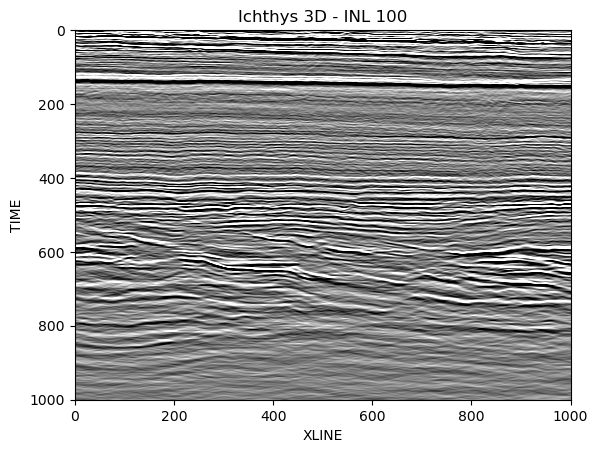

In [13]:
extent = [xlines[0], xlines[-1], samples[-1], samples[0]]
plt.imshow(seis_data[100,:,:].T, vmin=-vm, vmax=vm, cmap='gray', aspect='auto')

plt.xlabel('XLINE')
plt.ylabel('TIME')
plt.title('Ichthys 3D - INL 100')
plt.show()

## Plot time slice with Matplotlib

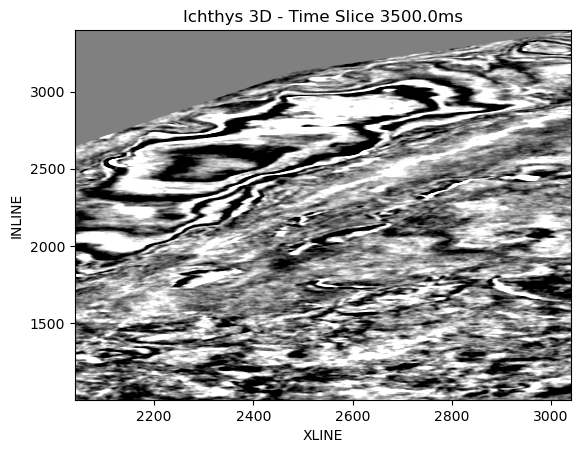

In [14]:
# Central time slice

tmid = len(samples)//2

extent = [xlines[0], xlines[-1], ilines[0], ilines[-1]]

plt.imshow(seis_data[:,:,tmid], vmin=-vm, vmax=vm, cmap='gray', origin='lower', aspect='auto', extent=extent)

plt.xlabel('XLINE')
plt.ylabel('INLINE')
plt.title('Ichthys 3D - Time Slice '+ str(samples[tmid])+'ms')
plt.show()

###  Plotting with HOLOVIZ

`conda install hvplot datashader`


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
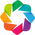

In [20]:
import hvplot.xarray
import panel as pn
import xarray as xr
from holoviews import opts
import holoviews as hv
hv.extension('bokeh')

opts.defaults(
    opts.Image(
        width=900, height=1000), tools=["layers_control"])

### Interactive functions

In [21]:
def plot_inl(inl, cmap):
    """
    Plot a single inline using hvplot
    """
    idx = inl
    da = xr.DataArray(seis_data[idx,:,:].T)   
    p = da.hvplot.image( clim=(-vm, vm),extent = [xlines[0], xlines[-1], samples[-1], samples[0]], cmap=cmap, flip_yaxis=True, xlabel='Xline_idx', ylabel='Time_idx', title='ILine '+ str(ilines[inl])) 
    return p

def plot_xln(xln, cmap):
    """
    Plot a single xline using hvplot
    """
    idx = xln
    da = xr.DataArray(seis_data[:,idx,:].T)    
    p = da.hvplot.image(clim=(-vm, vm), cmap=cmap, flip_yaxis=True, xlabel='Iline_idx', ylabel='Time_idx', title='XLine '+ str(xlines[xln])) 
    return p

def plot_top(t, cmap):
    """
    Plot a single time slice using hvplot
    """
    idx = t
    da = xr.DataArray(seis_data[:,:,idx])    
    p = da.hvplot.image(clim=(-vm, vm), cmap=cmap, xlabel='Xline_idx', ylabel='Iline_idx', title='Time '+str(samples[t])+'ms', extent = [xlines[0], xlines[-1], ilines[0], ilines[-1]]) 
    return p

iline_old = 0
xline_old = 0
t_old = 0

def plot_seis_slice(inline_indx, xline_indx, time_indx, cmap):
    global iline_old, xline_old, t_old
    if np.abs(iline_old - inline_indx) > 0:
        iline_old = inline_indx
        return plot_inl(inline_indx, cmap)
    elif np.abs(xline_old - xline_indx) > 0:
        xline_old = xline_indx
        return plot_xln(xline_indx, cmap)
    elif np.abs(t_old - time_indx) > 0:
        t_old = time_indx
        return plot_top(time_indx, cmap)

### Layout

In [ ]:
# pallet_select = pn.widgets.Select(name='Pallet', options=['gray', 'seismic', 'bwr'])  
# inline_slider = pn.widgets.IntSlider(name='Inline_indx', start=0, end=len(xlines))
# xline_slider = pn.widgets.IntSlider(name='Xline_indx', start=0, end=len(xlines))
# tline_slider = pn.widgets.IntSlider(name='Time_indx', start=0, end=len(samples))
# col = pn.Column(pn.Row (pallet_select), pn.Row (inline_slider, xline_slider, tline_slider))
# # layout_seis = pn.interact(plot_seis_slice, inline_indx = inline_slider, xline_indx=xline_slider, time_indx = tline_slider, cmap=pallet_select)
# layout_seis = pn.interact(plot_seis_slice, inline_indx = 500, xline_indx=500, time_indx = 500, cmap='seismic')
# pn.Column(col,  layout_seis[1])

In [22]:
# Test
pallet_select = pn.widgets.Select(name='Pallet', options=['gray', 'seismic', 'bwr'])  
inline_slider = pn.widgets.IntSlider(name='Inline_indx', start=0, end=len(xlines))
xline_slider = pn.widgets.IntSlider(name='Xline_indx', start=0, end=len(xlines))
tline_slider = pn.widgets.IntSlider(name='Time_indx', start=0, end=len(samples))
col = pn.Column(pn.Row (pallet_select), pn.Row (inline_slider, xline_slider, tline_slider))
# pn.bind(plot_seis_slice, inline_indx = inline_slider, xline_indx=xline_slider, time_indx = tline_slider, cmap=pallet_select)
layout_seis = pn.interact(plot_seis_slice, inline_indx = inline_slider, xline_indx=xline_slider, time_indx = tline_slider, cmap=pallet_select)
pn.Column(col,  layout_seis[1])

Column
    [0] Column
        [0] Row
            [0] Select(name='Pallet', options=['gray', 'seismic', ...], value='gray')
        [1] Row
            [0] IntSlider(end=1001, name='Inline_indx')
            [1] IntSlider(end=1001, name='Xline_indx')
            [2] IntSlider(end=1001, name='Time_indx')
    [1] Row
        [0] Str(None, name='interactive01733')